<a href="https://colab.research.google.com/github/57baek/gpt-from-scratch/blob/main/autograd/codes/autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

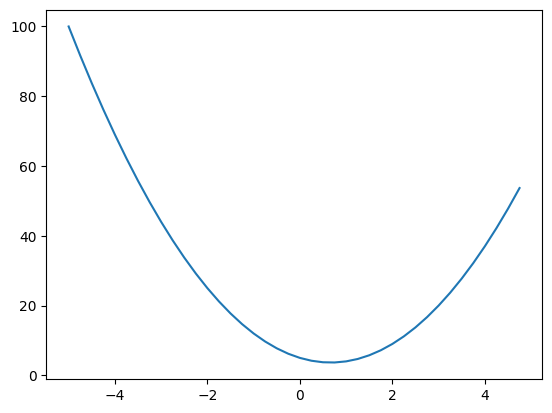

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3

print(f(x))
print(f(x+h))

(f(x+h) - f(x))/h # a simple derivative

3.666666666666667
3.6666666666696663


2.999378523327323e-06

In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self): # This controls how the object prints.
        return f"Value(data={self.data})"

a = Value(2.0)
a # will show <__main__.Value at 0x7e9ddb1142f0> without __repr__
b = Value(-3.0)
a,b

(Value(data=2.0), Value(data=-3.0))

In [ ]:
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # “If someone writes a + b, I will look for a.__add__(b).”
        out = Value(self.data + other.data) # Still need to define what would happen after matching
        return out
a = Value(2.0)
b = Value(-3.0)
a + b # Python internally translates it to a.__add__(b)

Value(data=-1.0)

In [ ]:
type(a+b)

__main__.Value

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = self.data * other.data
        return out

a = Value(2.0)
b = Value(-3.0)
a * b # Python internally translates it to a.__mul__(b)

-6.0

In [ ]:
class Value:
    def __init__(self, data, _children=()): # default value of an empty tuple
        self.data = data
        self._prev = set(_children) # the set of parent nodes that produced this node

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

a = Value(2.0)
b = Value(-3.0)
c = a * b
d = a * b + c

d._prev

{Value(data=-6.0), Value(data=-6.0)}

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = ''): # default empty string
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

d._op

'+'

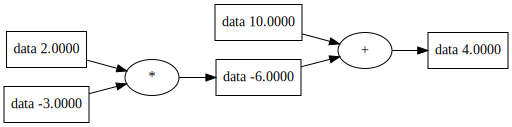

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(d)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'

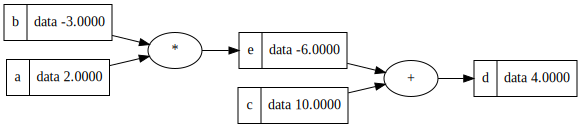

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(d)

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

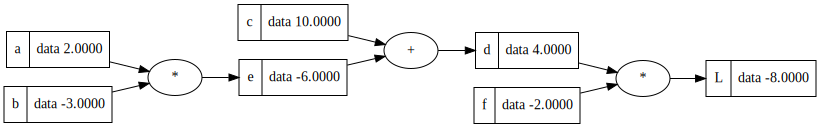

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

In [ ]:
# Partial derivative = "If I just change one input, how much does L change?" = Rate of change of the system wrt one variable while freezing all others = How sensitive L is to that input

def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0, label='a') # “How does the output L change if I change a?”
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data + h


    print((L2 - L1)/h)

lol() # Gradients (∂L/∂a, ∂L/∂b, etc.) are only meaningful inside the “world” of the function/system you’re studying -> They are local unitless scales


0.9999999999976694


In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0 - h, label='a') # “How does the output L change if I change a?”
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data


    print((L2 - L1)/h)

lol()


-6.00000000000378


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

In [ ]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0

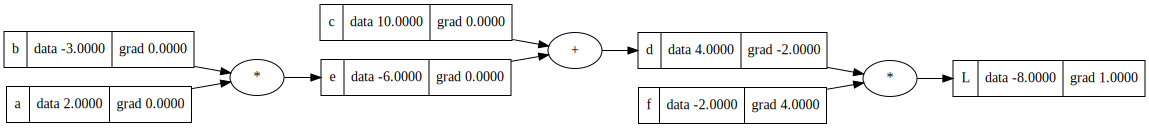

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

# 📘 Derivative of Multiplication (with Chain Rule)

We want the derivative of  

$$
L = d \cdot f
$$  

with respect to $d$.  

---

### 🔹 Step 1: Chain rule starting point  

By definition of backpropagation, we always start from:  

$$
\frac{\partial L}{\partial L} = 1
$$  

Then the chain rule says:  

$$
\frac{\partial L}{\partial d}
= \frac{\partial L}{\partial L} \cdot \frac{\partial L}{\partial d}
$$  

---

### 🔹 Step 2: Definition of derivative  

$$
\frac{\partial L}{\partial d}
= \lim_{h \to 0} \frac{L(d+h) - L(d)}{h}
$$  

---

### 🔹 Step 3: Plug in $L = d \cdot f$  

$$
= \lim_{h \to 0} \frac{(d+h)\cdot f - (d \cdot f)}{h}
$$  

---

### 🔹 Step 4: Expand  

$$
= \lim_{h \to 0} \frac{d \cdot f + h \cdot f - d \cdot f}{h}
$$  

The $d \cdot f$ terms cancel out.  

---

### 🔹 Step 5: Simplify  

$$
= \lim_{h \to 0} \frac{h \cdot f}{h}
$$  

---

### 🔹 Step 6: Cancel $h$  

$$
= f
$$  

---

✅ **Therefore (with chain rule):**  

$$
\frac{\partial L}{\partial d}
= \frac{\partial L}{\partial L} \cdot f
= 1 \cdot f
= f
$$

In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data


    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.labl='e'
    d = e + c; d.label='d'
    f = Value(-2.0 + h, label='f') # If I change f, I will see dL/dd = 4 amounts of change
    L = d * f; L.label='L'
    L2 = L.data


    print((L2 - L1)/h)

lol()


3.9999999999995595


# 📘 Derivate of Addition

We want the derivative of  

$$
d = c + e
$$  

with respect to $c$.  

---

🔹 **Step 1: Definition of derivative**  

$$
\frac{\partial d}{\partial c} = \lim_{h \to 0} \frac{d(c+h) - d(c)}{h}
$$  

---

🔹 **Step 2: Plug in $d = c + e$**  

$$
= \lim_{h \to 0} \frac{((c+h)+e) - (c+e)}{h}
$$  

---

🔹 **Step 3: Expand**  

$$
= \lim_{h \to 0} \frac{c + h + e - c - e}{h}
$$  

---

🔹 **Step 4: Simplify**  

$$
= \lim_{h \to 0} \frac{h}{h}
$$  

---

🔹 **Step 5: Cancel $h$**  

$$
= 1
$$  

---

✅ Therefore:  

$$
\frac{\partial d}{\partial c} = 1
$$

In [ ]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    D1 = d.data


    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 + h, label='c')
    e = a * b; e.labl='e'
    d = e + c; d.label='d'
    D2 = d.data


    print((D2 - D1)/h)

lol()


0.9999999999976694


# 🔗 Chain Rule Example

Suppose we want:

$$
\frac{\partial L}{\partial c}
$$

but $L$ depends on $c$ **through** an intermediate variable $d$.  

---

### ✅ Chain Rule Formula

$$
\frac{\partial L}{\partial c}
= \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c}
$$

---

### 🧩 Explanation

- We know $\frac{\partial L}{\partial d}$: how $L$ changes with $d$.  
- We know $\frac{\partial d}{\partial c}$: how $d$ changes with $c$.  
- Multiplying them gives $\frac{\partial L}{\partial c}$: how $L$ changes with $c$ through $d$.  

---

### 🔍 Intuition

The chain rule says:  
*“If $c$ nudges $d$, and $d$ nudges $L$, then the total effect of $c$ on $L$ is the product of those nudges.”*  

It’s like passing the influence along the chain:

$$
c \;\;\rightarrow\;\; d \;\;\rightarrow\;\; L
$$

# 🔗 Why the Chain Rule Works (Mathematical Proof)

Suppose we have a function of a function:

$$
L = f(d), \quad d = g(c)
$$

So overall:

$$
L = f(g(c))
$$

We want:

$$
\frac{dL}{dc}
$$

---

### 🔹 Step 1: Definition of derivative

$$
\frac{dL}{dc} = \lim_{h \to 0} \frac{L(c+h) - L(c)}{h}
$$

Substitute $L(c) = f(g(c))$:

$$
= \lim_{h \to 0} \frac{f(g(c+h)) - f(g(c))}{h}
$$

---

### 🔹 Step 2: Introduce $\Delta d$

Let:

$$
\Delta d = g(c+h) - g(c)
$$

So:

$$
\frac{dL}{dc} = \lim_{h \to 0} \frac{f(g(c) + \Delta d) - f(g(c))}{h}
$$

---

### 🔹 Step 3: Multiply and divide by $\Delta d$

$$
\frac{dL}{dc} = \lim_{h \to 0}
\left(
\frac{f(g(c)+\Delta d) - f(g(c))}{\Delta d}
\cdot
\frac{\Delta d}{h}
\right)
$$

---

### 🔹 Step 4: Interpret the two limits

1. The first fraction is the derivative of $f$ with respect to $d$:

$$
\lim_{\Delta d \to 0} \frac{f(g(c)+\Delta d) - f(g(c))}{\Delta d}
= f'(g(c))
$$

2. The second fraction is the derivative of $g$ with respect to $c$:

$$
\lim_{h \to 0} \frac{g(c+h) - g(c)}{h}
= g'(c)
$$

---

### 🔹 Step 5: Multiply results

$$
\frac{dL}{dc} = f'(g(c)) \cdot g'(c)
$$

---

✅ **Therefore, the chain rule:**

$$
\frac{dL}{dc} = \frac{dL}{dd} \cdot \frac{dd}{dc}
$$

This shows that the rate of change "flows through" intermediate variables.

In [ ]:
a.grad = 6.0
b.grad = -4.0
e.grad = -2.0
c.grad = -2.0

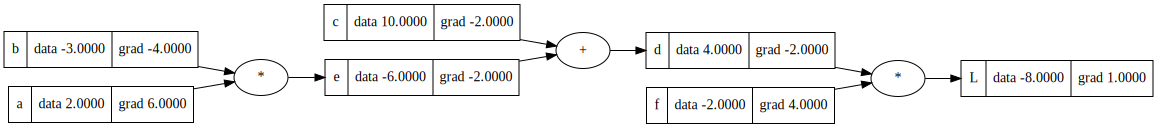

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

# 📘 Gradient of $L$ with respect to $a$

We know:

$$
L = d \cdot f, \quad d = e + c, \quad e = a \cdot b
$$

---

### 🔹 Step 1: Gradient flowing into $e$

Suppose from previous steps we already computed:

$$
\frac{\partial L}{\partial e} = -2.0
$$

---

### 🔹 Step 2: Local derivative of $e$ with respect to $a$

Since:

$$
e = a \cdot b
$$  

the derivative is:

$$
\frac{\partial e}{\partial a} = b
$$

---

### 🔹 Step 3: Apply the chain rule

Now combine them:

$$
\frac{\partial L}{\partial a}
= \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a}
$$

---

### 🔹 Step 4: Plug in numbers

$$
\frac{\partial L}{\partial a} = (-2.0) \cdot (-3.0)
$$  

---

✅ Therefore:

$$
a.\text{grad} = 6.0
$$